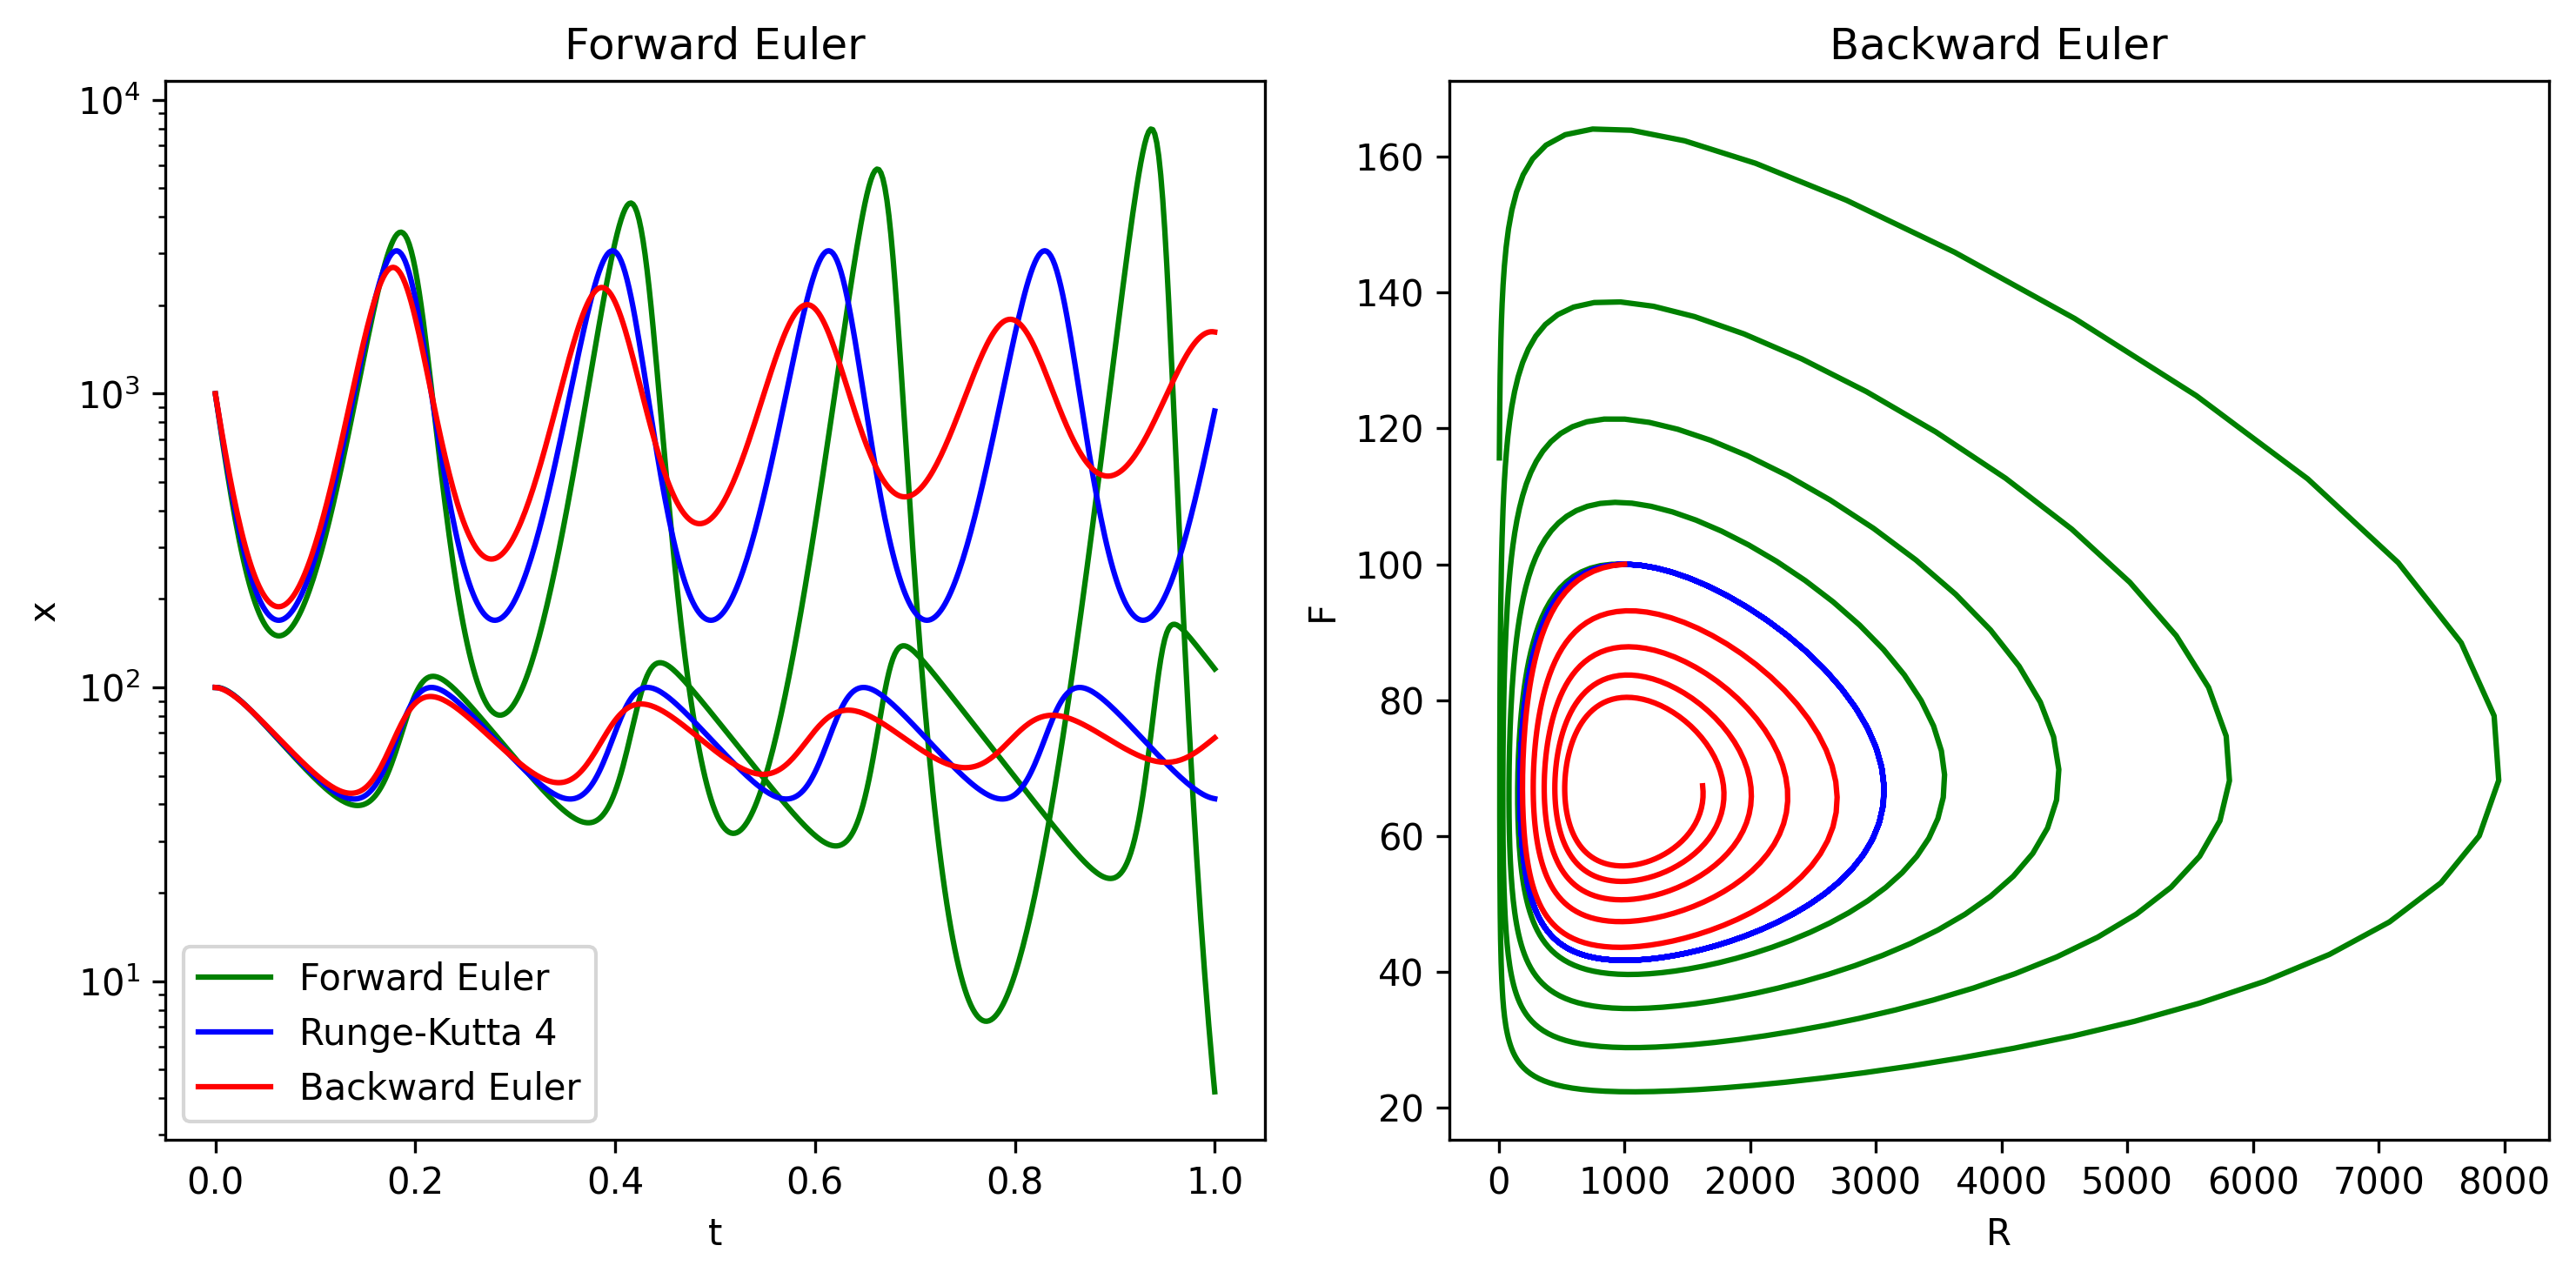

In [1]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Setting up the parameters for the system of ODEs
alpha = 100
beta = 1.5
gamma = 10
delta = 0.01
T = 1  # total time to simulate
h = 2e-3  # step size
N = int(np.ceil(T/h))  # number of timesteps
tolx = 1e-10  # for Newton's method in the backwards Euler method
x0 = np.array([1000, 100])  # initial values [R(0); F(0)]
t = h * np.arange(N + 1)

# Defining the function f(x) representing the system of ODEs
def f(x):
    return np.array([alpha * x[0] - beta * x[0] * x[1],
                     -gamma * x[1] + delta * x[0] * x[1]])

# Defining the Jacobian matrix of the function f(x)
def J(x):
    return np.array([[alpha-beta*x[1], -beta*x[0]],
                     [delta*x[1], -gamma+delta*x[0]]])

# Applying the forward Euler method to solve the ODEs
x = np.zeros((2, N + 1))
x[:, 0] = x0
for i in range(N):
    x[:, i+1] = x[:, i] + h * f(x[:, i])

plt.figure(figsize=(10, 5), dpi=300)
plt.subplot(1, 2, 1)
plt.plot(t, x[0], 'g-', label='Forward Euler')
plt.plot(t, x[1], 'g-')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Forward Euler')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x[0], x[1], 'g-')
plt.xlabel('R')
plt.ylabel('F')
plt.title('Forward Euler')

# Applying the Runge-Kutta 4 method to solve the ODEs
x = np.zeros((2, N + 1))
x[:, 0] = x0
for i in range(N):
    k1 = f(x[:, i])
    k2 = f(x[:, i] + k1 * h/2)
    k3 = f(x[:, i] + k2 * h/2)
    k4 = f(x[:, i] + k3 * h)
    x[:, i+1] = x[:, i] + h/6 * (k1 + 2*k2 + 2*k3 + k4)

plt.subplot(1, 2, 1)
plt.plot(t, x[0], 'b-', label='Runge-Kutta 4')
plt.plot(t, x[1], 'b-')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x[0], x[1], 'b-')
plt.xlabel('R')
plt.ylabel('F')
plt.title('Runge-Kutta 4')

# Applying the backward Euler method to solve the ODEs
x = np.zeros((2, N + 1))
x[:, 0] = x0
I = np.eye(2)  # 2x2 identity matrix
for i in range(N):
    x[:, i+1] = x[:, i]  # initial guess = solution from the previous timestep
    while True:
        dx = np.linalg.solve(h * J(x[:, i+1]) - I, x[:, i+1] - x[:, i] - h * f(x[:, i+1]))
        x[:, i+1] = x[:, i+1] + dx
        if np.linalg.norm(dx) < tolx:
            break

plt.subplot(1, 2, 1)
plt.plot(t, x[0], 'r-', label='Backward Euler')
plt.plot(t, x[1], 'r-')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x[0], x[1], 'r-')
plt.xlabel('R')
plt.ylabel('F')
plt.title('Backward Euler')

plt.subplot(1, 2, 1)
plt.yscale('log')

plt.tight_layout()
plt.show()
